In [1]:
from cpymad.madx import Madx
m = Madx()
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2022.11.14 18:58:03      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [2]:
def plotbeta(twissd):
    plt.figure(figsize=(10,6))
    ax1 = plt.gca()
    ax2 = plt.twinx()
    ax1.plot(twissd.s, twissd.betx, 'bo-', label='$\\beta_x$')
    ax1.plot(twissd.s, twissd.bety, 'ro-', label='$\\beta_y$')
    ax1.set_ylabel('$\\beta_{x,y} \\ / \\ \mathrm{m}$')
    ax1.legend(bbox_to_anchor=(1.15,1))
    ax2.plot(twissd.s, twissd.dx, 'c.--', label='$D_x$')
    ax2.legend(bbox_to_anchor=(1.15,0.8))
    ax2.set_ylabel('$D_x \\ / \\ \mathrm{m}$')
    ax1.set_xlabel('$s \\ / \\ \mathrm{m}$')
    plt.grid()
    plt.show()

In [3]:
def plotx(twissd, special_marker = None):
    plt.figure(figsize=(10,6))
    ax1 = plt.gca()
    ax2 = plt.twinx()
    ax1.plot(twissd.s, twissd.x*1e3, 'ko-', label='$x$')
    if special_marker is not None:
        ax1.plot(twissd.s.loc[special_marker], twissd.x.loc[special_marker]*1e3, 'ro')
    ax1.set_ylabel('$x \\ / \\ \mathrm{mm}$')
    ax1.legend(bbox_to_anchor=(1.15,1))
    ax2.plot(twissd.s, twissd.px*1000, 'c.--', label='$x^\prime$')
    if special_marker is not None:
        ax2.plot(twissd.s.loc[special_marker], twissd.px.loc[special_marker]*1e3, 'b.')
    ax2.legend(bbox_to_anchor=(1.15,0.8))
    ax2.set_ylabel('$x^\prime \\ / \\ \mathrm{mrad}$')
    ax1.set_xlabel('$s \\ / \\ \mathrm{m}$')
    ax1.grid()
    plt.show()

In [4]:
def plotLatticeSeries(ax,series, height=1., v_offset=0., width=0.1, color='r',alpha=0.5,lw=3):
    aux=series
    ax.add_patch(
    patches.Rectangle(
        (aux.s-width, v_offset-height/2.),   # (x,y)
        width,          # width
        height,          # height
        color=color, alpha=alpha,lw=lw
    )
    )
    return

## Solution From exercise 3

In [5]:
m.input('''
TITLE, ’CAS2019 Third  Exercise’; 

circum=1000.0;
ncell = 20; !Number of cells 
lcell = circum/ncell;
lq = 3.00; !Length of a quadrupole

!element definitions;
!define bending magnet as multipole 
!we have 4 bending magnets per cell
mb:multipole,knl={2.0*pi/(4*ncell)};

!define quadrupoles as multipoles 
qf: multipole,knl:={0,0.0098*lq+qtrim_f}; 
qd: multipole,knl:={0,-0.0098*lq+qtrim_d};

// define the sextupoles as multipole
lsex = 0.00001; // dummy length, only used in the sequence;

// ATTENTION: must use knl:= and NOT knl= to match later ! 
msf: multipole, knl:={0,0,ksf};
msd: multipole, knl:={0,0,ksd};

// Extraction bump correctors
hks1=0;
hks2=0;
hks3=0;
hks4=0;
hbump1: hkicker, kick:=hks1;
hbump2: hkicker, kick:=hks2;
hbump3: hkicker, kick:=hks3;
hbump4: hkicker, kick:=hks4;

// Extraction kicker
extks = 0;
extrk: hkicker, kick:=extks;

!sequence declaration;
cas3: sequence, refer=centre, l=circum;
   start_machine: marker, at = 0;
   n = 1;
   while (n < ncell+1) {
    qf: qf,   at=(n-1)*lcell;
    msf: msf, at=(n-1)*lcell + lsex/2.0;
    if (n==1) {
     extrkicker: extrk, at=(n-1)*lcell + 0.05*lcell;
    }
    mb: mb,   at=(n-1)*lcell + 0.15*lcell;
    mb: mb,   at=(n-1)*lcell + 0.35*lcell;
    qd: qd,   at=(n-1)*lcell + 0.50*lcell;
    msd: msd, at=(n-1)*lcell + 0.50*lcell + lsex/2.0;
    if (n==1) {
     hk1: hbump1, at=(n-1)*lcell + 0.57*lcell;
    }
    mb: mb,   at=(n-1)*lcell + 0.65*lcell;
    if (n==1) {
     hk2: hbump2, at=(n-1)*lcell + 0.73*lcell;
     extraction: marker, at=(n-1)*lcell + 0.75*lcell;
     hk3: hbump3, at=(n-1)*lcell + 0.77*lcell;
    }
    mb: mb,   at=(n-1)*lcell + 0.85*lcell;
    if (n==1) {
     hk4: hbump4, at=(n-1)*lcell + 0.93*lcell;
    }
    at=(n-1)*lcell;
    n = n + 1;
}
end_machine: marker at=circum;
endsequence;

!define the beam and its properties
Beam, particle = proton, sequence=cas3, energy = 20.0;

use, sequence=cas3;

!!!!! very interesting option !!!!!
select,flag=interpolate, class=drift, slice=5, range=#s/#e;

ksf=0;
ksd=0;
''')

++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined
++++++ info: at redefined
++++++ info: n redefined


True

In [6]:
m.input('''
! Matching
match, sequence=cas3;
  vary,name=ksf, step=0.00001;
  vary,name=ksd, step=0.00001;
  global,DQ1=0.0;
  global,DQ2=0.0;
  Lmdif, calls=10, tolerance=1.0e-21;
endmatch;''')

START MATCHING

number of sequences: 1
sequence name: cas3
number of variables:    2
user given constraints: 1
total constraints:      2

START LMDIF:

Initial Penalty Function =   0.12684517E+02


call:       4   Penalty function =   0.94476847E+01
call:       7   Penalty function =   0.44018550E+01
call:      10   Penalty function =   0.13489930E-20
 ++++++++++ LMDIF ended: call limit
call:      10   Penalty function =   0.13489930E-20

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
Global constraint:         dq1          4     0.00000000E+00    -3.58613732E-11     1.28603809E-21
Global constraint:         dq2          4     0.00000000E+00    -7.93441358E-12     6.29549189E-23


Final Penalty Function =   1.34899301e-21





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
--------------------------

True

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
              1000                 -0       0.1789932276        2.363642011 

                q1                dq1            betxmax              dxmax 
       2.395724244   -3.586137324e-11        100.0267292        34.45748962 

             dxrms             xcomax             xcorms                 q2 
       29.11969042                  0                  0        2.395724244 

               dq2            betymax              dymax              dyrms 
  -7.934413582e-12        100.0267292                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

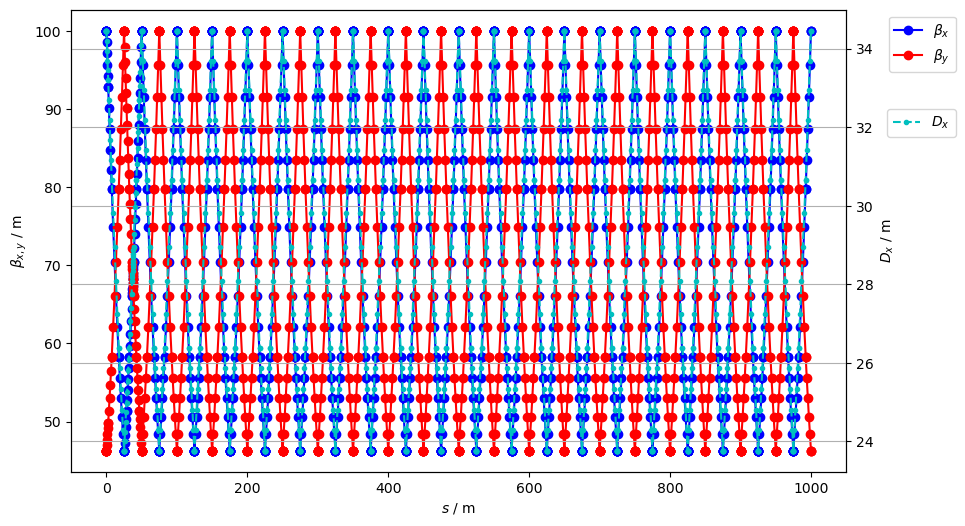

In [7]:
twiss3 = m.twiss().dframe()
plotbeta(twiss3)

In [8]:
surveydata = m.survey().dframe()

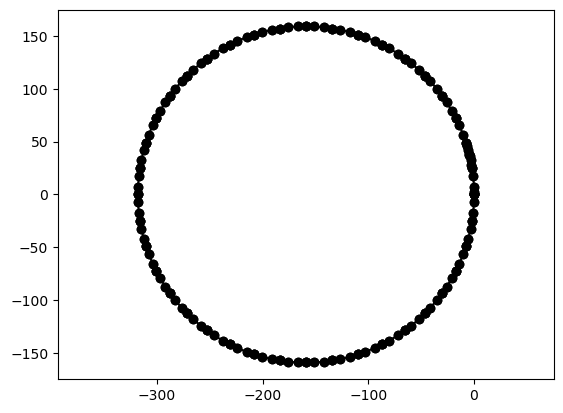

In [9]:
plt.plot(surveydata.x, surveydata.z, 'ko-')
plt.axis('equal')
plt.show()

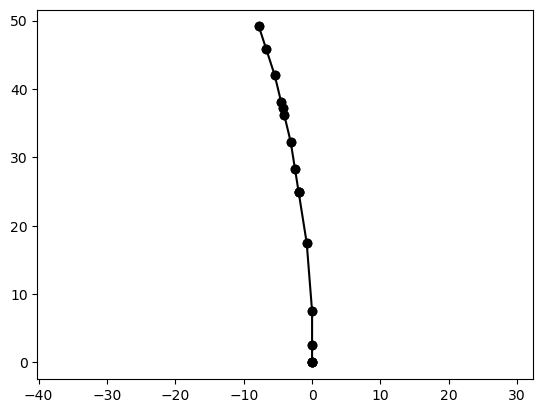

In [10]:
plt.plot(surveydata.x.loc[:'qf[2]'], surveydata.z.loc[:'qf[2]'], 'ko-')
plt.axis('equal')
plt.show()

In [11]:
surveyfodo1 = surveydata.loc[:'qf[2]']

In [12]:
surveydata.loc[:'qf[2]']

,name,keyword,s,l,angle,x,y,z,theta,phi,psi,globaltilt,tilt,slot_id,assembly_id,mech_sep,v_pos,comments
#s,cas3$start:1,marker,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
start_machine,start_machine:1,marker,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
qf,qf:1,multipole,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
drift_0[0],drift_0:0,drift,0.000005,0.000005,0.00000,0.000000,0.0,0.000005,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
msf,msf:1,multipole,0.000005,0.000000,0.00000,0.000000,0.0,0.000005,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
drift_1[0],drift_1:0,drift,2.500000,2.499995,0.00000,0.000000,0.0,2.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
extrkicker,extrkicker:1,hkicker,2.500000,0.000000,0.00000,0.000000,0.0,2.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
drift_2[0],drift_2:0,drift,7.500000,5.000000,0.00000,0.000000,0.0,7.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
mb,mb:1,multipole,7.500000,0.000000,0.07854,0.000000,0.0,7.500000,-0.078540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
drift_3[0],drift_3:0,drift,17.500000,10.000000,0.00000,-0.784591,0.0,17.469173,-0.078540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,


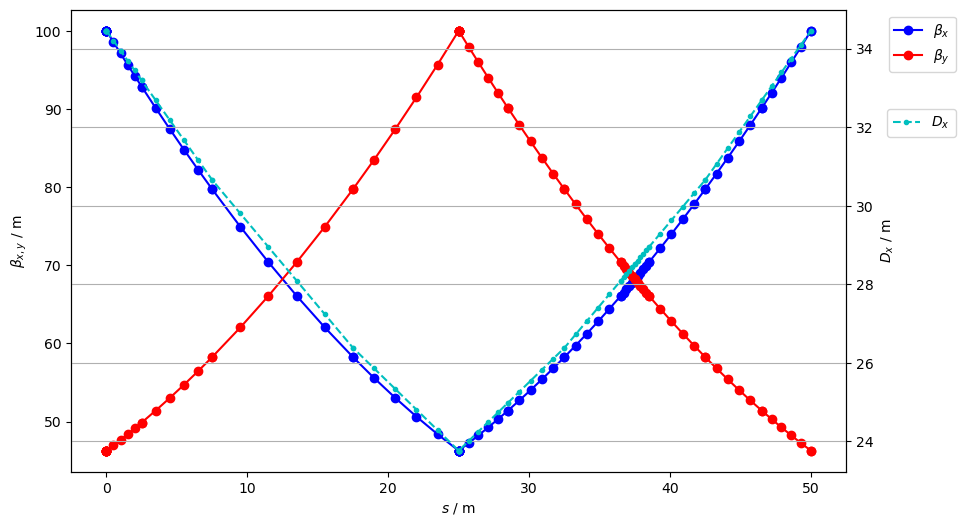

In [13]:
plotbeta(twiss3.loc[:'qf[2]'])

In [14]:
list(twiss3.loc[:'qf[2]'].columns)

['name',
 'keyword',
 's',
 'betx',
 'alfx',
 'mux',
 'bety',
 'alfy',
 'muy',
 'x',
 'px',
 'y',
 'py',
 't',
 'pt',
 'dx',
 'dpx',
 'dy',
 'dpy',
 'wx',
 'phix',
 'dmux',
 'wy',
 'phiy',
 'dmuy',
 'ddx',
 'ddpx',
 'ddy',
 'ddpy',
 'r11',
 'r12',
 'r21',
 'r22',
 'energy',
 'l',
 'angle',
 'k0l',
 'k0sl',
 'k1l',
 'k1sl',
 'k2l',
 'k2sl',
 'k3l',
 'k3sl',
 'k4l',
 'k4sl',
 'k5l',
 'k5sl',
 'k6l',
 'k6sl',
 'k7l',
 'k7sl',
 'k8l',
 'k8sl',
 'k9l',
 'k9sl',
 'k10l',
 'k10sl',
 'k11l',
 'k11sl',
 'k12l',
 'k12sl',
 'k13l',
 'k13sl',
 'k14l',
 'k14sl',
 'k15l',
 'k15sl',
 'k16l',
 'k16sl',
 'k17l',
 'k17sl',
 'k18l',
 'k18sl',
 'k19l',
 'k19sl',
 'k20l',
 'k20sl',
 'ksi',
 'hkick',
 'vkick',
 'tilt',
 'e1',
 'e2',
 'h1',
 'h2',
 'hgap',
 'fint',
 'fintx',
 'volt',
 'lag',
 'freq',
 'harmon',
 'slot_id',
 'assembly_id',
 'mech_sep',
 'v_pos',
 'bbcharge',
 'xma',
 'yma',
 'sigx',
 'sigy',
 'lrad',
 'parent',
 'comments',
 're11',
 're12',
 're13',
 're14',
 're15',
 're16',
 're21',
 're22

In [15]:
m.input('''
! Matching
match, sequence=cas3;
  vary,name=hks1;
  vary,name=hks2;
  vary,name=hks3;
  vary,name=hks4;
  
  ! constraint: all of the ring at zero (weight 1)
  weight, x=1, px=1;
  constraint, range=#s/hk1, x=0, px=0;
  constraint, range=hk4/#e, x=0, px=0;
  
  ! constraint: extraction point at x = 2 mm, px = 0 (weight 100) 
  weight, x=100, px=100;
  constraint, range=extraction, x=2.0e-3, px=0;
  Lmdif, calls=1000, tolerance=1.0e-10;
endmatch;''')

START MATCHING

number of sequences: 1
sequence name: cas3
number of variables:    4
user given constraints: 2
total constraints:      652

START LMDIF:

Initial Penalty Function =   0.40000000E-01


call:       6   Penalty function =   0.62512785E-07
call:      11   Penalty function =   0.62495419E-07
 ++++++++++ LMDIF ended: converged successfully
call:      15   Penalty function =   0.62495419E-07

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
cas3$start:1               x            4     0.00000000E+00     1.72110240E-07     2.96219347E-14
cas3$start:1               px           4     0.00000000E+00     3.46761853E-09     1.20243783E-17
start_machine:1            x            4     0.00000000E+00     1.72110240E-07     2.96219347E-14
start_machine:1            px           4     0.00000000E+00     3.46761853E-09     1.202437

True

enter Twiss module
  
iteration:   1 error:   2.514390E-07 deltap:   0.000000E+00
orbit:   1.721102E-07  3.467619E-09  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
              1000                 -0       0.1789929133        2.363644086 

                q1                dq1            betxmax              dxmax 
       2.395724244    2.868495158e-10        100.0267312        34.45748981 

             dxrms             xcomax             xcorms                 q2 
       29.11964334              0.002    0.0002842532629        2.395724245 

               dq2            betymax              dymax              dyrms 
  -3.083767839e-09         100.026731                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

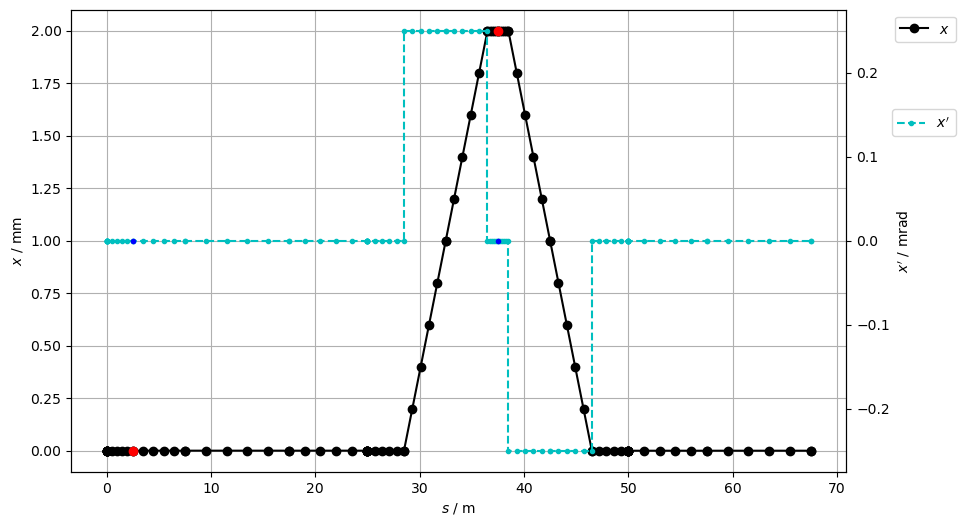

In [16]:
twissbump = m.twiss().dframe()
plotx(twissbump.loc[:'mb[6]'], ['extraction', 'extrkicker'])

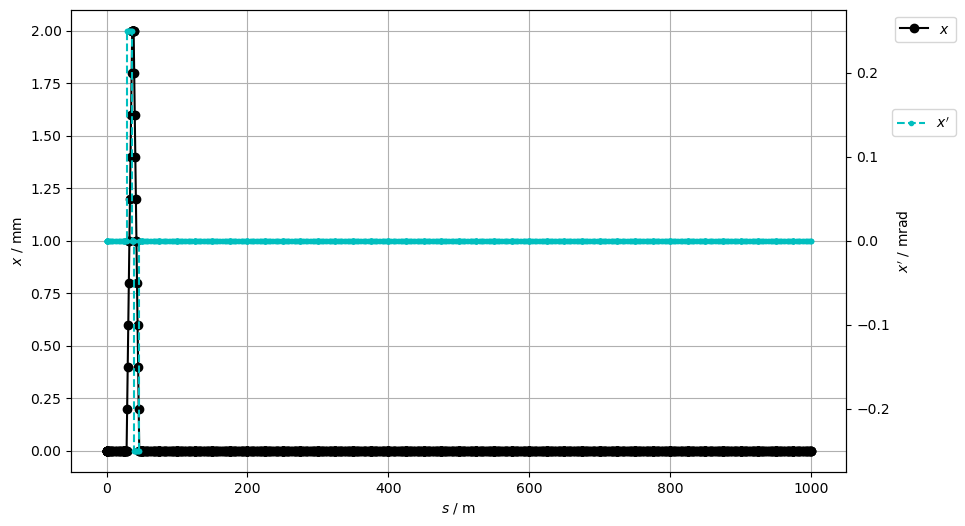

In [17]:
plotx(twissbump)

In [18]:
twissbump.loc['extraction'][['x', 'px']]

x     0.002
px      0.0
Name: extraction, dtype: object

In [19]:
m.input('''
! save twiss results at start of the sequence for periodic solution with bump
savebeta, label=bump, place=#s, sequence=cas3;
twiss;
! Matching
match, sequence=cas3, beta0=bump;
  vary, name=extks;
  
  ! constraint: extraction point at x = 4 mm
  constraint, range=extraction, x=4.0e-3;
  Lmdif, calls=1000, tolerance=1.0e-10;
endmatch;''')

enter Twiss module
  
iteration:   1 error:   2.514390E-07 deltap:   0.000000E+00
orbit:   1.721102E-07  3.467619E-09  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
              1000                 -0       0.1789929133        2.363644086 

                q1                dq1            betxmax              dxmax 
       2.395724244    2.868495158e-10        100.0267312        34.45748981 

             dxrms             xcomax             xcorms                 q2 
       29.11964334              0.002    0.0002842532629        2.395724245 

               dq2            betymax              dymax              dyrms 
  -3.083767839e-09         100.026731                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

enter Twiss module
 Found 6 initial orbit vector values from twiss command. 
  
open line - error with deltap:   0.000000E+00
initial orbit vector:   1.721102E-07  3.467619E-09  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
final orbit vector:     2.804753E-03  6.628059E-06  0.000000E+00  0.000000E+00 -2.884307E-03  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
              1000                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
       2.395769321                  0         100.047092        34.46184034 

             dxrms             xcomax             xcorms                 q2 
        29.1191678     0.004436357082     0.002708157395        2.395769367 

               dq2            betymax              dymax              dyrms 
                 0        100.0421074                  0                  0 

            ycomax 

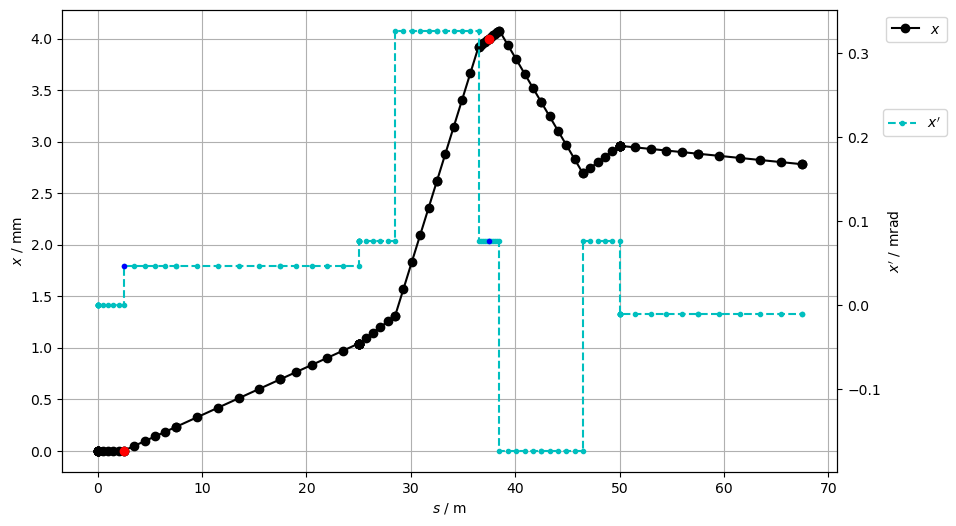

In [20]:
m.input('twiss, beta0=bump;')
twissextr = m.table.twiss.dframe()
plotx(twissextr.loc[:'mb[6]'], ['extraction', 'extrkicker'])

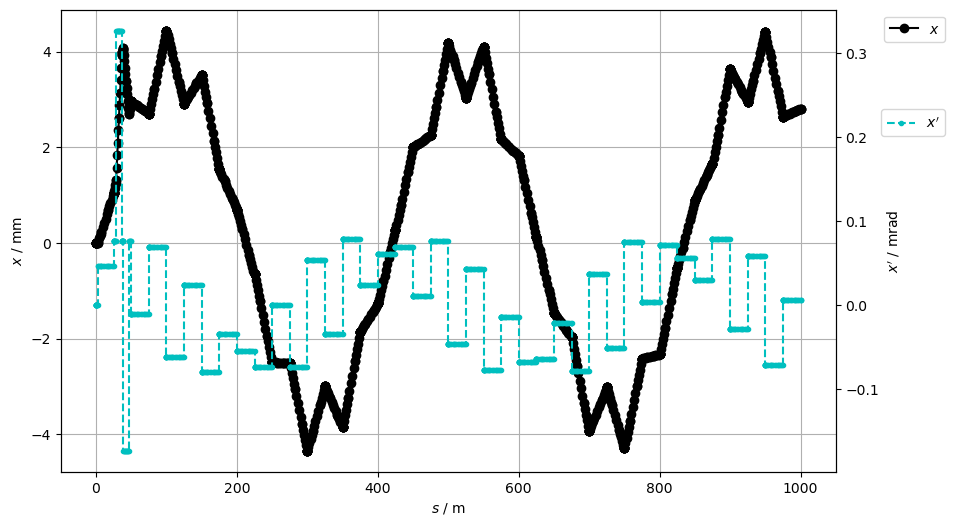

In [21]:
plotx(twissextr)

In [22]:
twissextr.loc['extraction'][['x', 'px']]

x        0.004
px    0.000077
Name: extraction, dtype: object

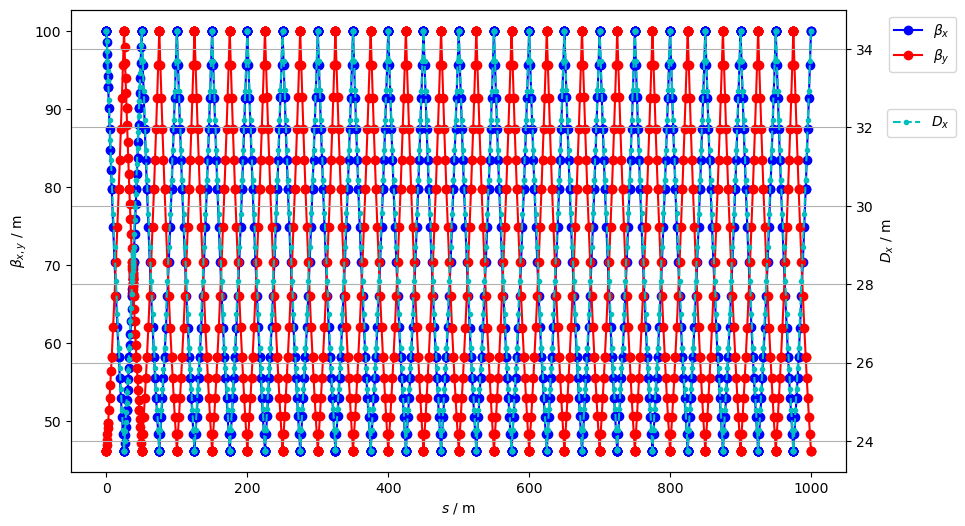

In [23]:
plotbeta(twissextr)

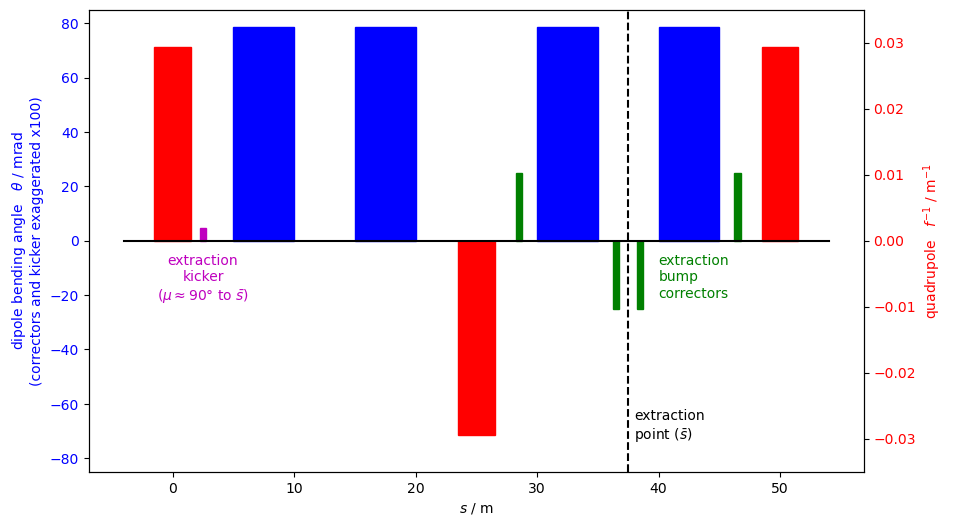

In [24]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax2 = plt.twinx()
for name, elem in twissextr.loc[:'qf[2]'].iterrows():
    if name[0] == 'q': # quadrupole
        ax2.add_patch(patches.Rectangle((elem.s-3/2, 0), width=3, height=elem.k1l, color='r'))
    if name[:2] == 'mb': # dipole
        ax.add_patch(patches.Rectangle((elem.s-5/2, 0), width=5, height=elem.k0l*1e3, color='b'))
    if name[:2] == 'hk': # extraction bump correctors
        ax.add_patch(patches.Rectangle((elem.s-0.5/2, 0), width=0.5, height=elem.hkick*1e5, color='g'))
    if name == 'extrkicker': # extraction bump correctors
        ax.add_patch(patches.Rectangle((elem.s-0.5/2, 0), width=0.5, height=elem.hkick*1e5, color='m'))
plt.axvline(twissextr.loc['extraction'].s, ls='--', color='k')
ax.set_ylim((-85, 85))
ax2.set_ylim((-0.035, 0.035))
plt.plot((-4,54), (0,0), 'k')
plt.text(40,-0.002,'extraction\nbump\ncorrectors', color='g', va='top')
plt.text(twissextr.loc['extrkicker'].s,-0.002,'extraction\nkicker\n($\\mu \\approx 90°$ to $\\bar{s}$)', color='m', ha='center', va='top')
plt.text(38,-0.03,'extraction\npoint ($\\bar{s}$)', color='k')
ax.set_xlabel('$s \\ / \\ \\mathrm{m}$')
ax.set_ylabel('dipole bending angle   $\\theta \\ / \\ \\mathrm{mrad}$\n(correctors and kicker exaggerated x100)', color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax2.set_ylabel('quadrupole   $f^{-1} \\ / \\ \\mathrm{m^{-1}}$', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()